In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
df = pd.read_csv('TelecomFactory_train_data.csv')

In [3]:
df.head()

,CLIENT_ID,FLD_1,FLD_2,FLD_3,FLD_4,FLD_5,FLD_6,FLD_7,FLD_8,FLD_9,...,FLD_398,FLD_399,FLD_400,FLD_401,FLD_402,FLD_403,FLD_404,target_1,target_2,target_3
0,9,0,F,4,NaN,34.0,3,0,500000.0,431000.0,...,NaN,NaN,NaN,1.0,1.0,11,8,1,0,0
1,11,0,F,3,NaN,47.0,6,0,120000.0,130000.0,...,NaN,NaN,NaN,10.0,NaN,2,0,1,0,0
2,12,0,F,1,NaN,56.0,3,0,100000.0,100000.0,...,NaN,NaN,NaN,11.0,11.0,3,2,1,0,0
3,14,0,F,3,NaN,56.0,6,0,500000.0,50000.0,...,NaN,NaN,NaN,2.0,2.0,13,7,1,0,0
4,15,0,F,2,NaN,49.0,5,0,100000.0,460000.0,...,NaN,NaN,NaN,7.0,7.0,1,1,1,0,0


In [4]:
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        print(col)


FLD_2
FLD_124
FLD_125


In [3]:
df = pd.get_dummies(df, columns=['FLD_2'], drop_first=True)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120920 entries, 0 to 120919
Columns: 409 entries, CLIENT_ID to FLD_2_M
dtypes: float64(405), object(2), uint8(2)
memory usage: 375.7+ MB


In [4]:
df = pd.get_dummies(df, columns=['FLD_124'], drop_first=True)
df = pd.get_dummies(df, columns=['FLD_125'], drop_first=True)

In [5]:
for col in df.columns:
    p = df[col].isna().sum() // len(df) * 100
    if p > 50:
        df = df.drop(col, axis=1)
    else:
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)

In [9]:
df.isna().sum()

CLIENT_ID                          0
FLD_1                              0
FLD_3                              0
FLD_4                              0
FLD_5                              0
                                  ..
FLD_125_Филиал Уральск             0
FLD_125_Филиал Усть-Каменогорск    0
FLD_125_Филиал Шымкент             0
FLD_125_Филиал Экибастуз           0
FLD_125_Филиал Южная столица       0
Length: 464, dtype: int64

In [6]:
for col in df.columns:
    minxx = df[col].min()
    maxx = df[col].max()
    df[col] = (df[col] - minxx) / (maxx - minxx)



In [11]:
df.head()

,CLIENT_ID,FLD_1,FLD_3,FLD_4,FLD_5,FLD_6,FLD_7,FLD_8,FLD_9,FLD_10,...,FLD_125_Филиал Талгар,FLD_125_Филиал Талдыкорган,FLD_125_Филиал Тараз,FLD_125_Филиал Темиртау,FLD_125_Филиал Туркестан,FLD_125_Филиал Уральск,FLD_125_Филиал Усть-Каменогорск,FLD_125_Филиал Шымкент,FLD_125_Филиал Экибастуз,FLD_125_Филиал Южная столица
0,0.000000,NaN,0.833333,0.009362,0.557292,0.500,0.0,2.776698e-06,0.000061,0.021363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000008,NaN,0.666667,0.009362,0.625000,0.875,0.0,6.664075e-07,0.000018,0.008545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000012,NaN,0.333333,0.009362,0.671875,0.500,0.0,5.553396e-07,0.000014,0.005127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000019,NaN,0.666667,0.009362,0.671875,0.875,0.0,2.776698e-06,0.000007,0.004273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000023,NaN,0.500000,0.009362,0.635417,0.750,0.0,5.553396e-07,0.000065,0.001709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df = df.drop('CLIENT_ID', axis=1)

In [8]:
X = df.drop(['target_1', 'target_2', 'target_3'], axis=1)
y1 = df['target_1']
y2 = df['target_2']
y3 = df['target_3']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Nitro5\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Nitro5\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\Nitro5\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [10]:
X_scaled = np.nan_to_num(X_scaled)
pca = PCA()
pca.fit(X_scaled)

PCA()

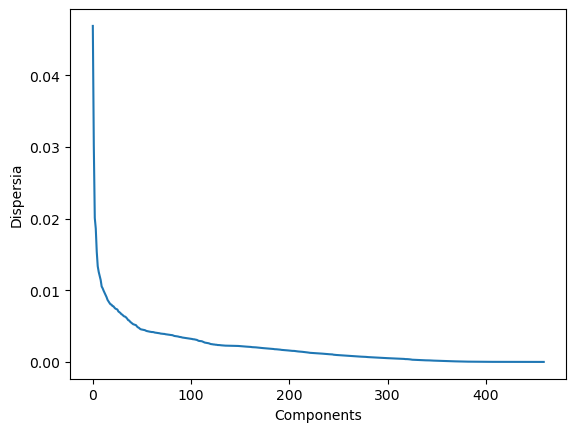

In [16]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Dispersia')
plt.show()

In [11]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print('Components, taht retain 95% disp:', n_components)

Components, taht retain 95% disp: 258


In [12]:
pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X_scaled)

In [13]:
lr = LogisticRegression()
lr.fit(X_pca, y1)
lr.fit(X_pca, y2)
lr.fit(X_pca, y3)

C:\Users\Nitro5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nitro5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LogisticRegression()

In [14]:
y1_pred = lr.predict(X_pca)
y2_pred = lr.predict(X_pca)
y3_pred = lr.predict(X_pca) 
a1 = accuracy_score(y1, y1_pred)
a2 = accuracy_score(y2, y2_pred)
a3 = accuracy_score(y3, y3_pred)
print('Accuracy:', a1)
print('Accuracy:', a2)
print('Accuracy:', a3)

Accuracy: 0.8255871650678134
Accuracy: 0.8411511743301356
Accuracy: 0.8706830962619914


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y1, y1_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90    101905
         1.0       0.16      0.03      0.05     19015

    accuracy                           0.83    120920
   macro avg       0.50      0.50      0.48    120920
weighted avg       0.74      0.83      0.77    120920



In [16]:
print(classification_report(y2, y2_pred))
print(classification_report(y3, y3_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91    103877
         1.0       0.15      0.03      0.05     17043

    accuracy                           0.84    120920
   macro avg       0.50      0.50      0.48    120920
weighted avg       0.76      0.84      0.79    120920

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93    104802
         1.0       0.58      0.11      0.19     16118

    accuracy                           0.87    120920
   macro avg       0.73      0.55      0.56    120920
weighted avg       0.84      0.87      0.83    120920



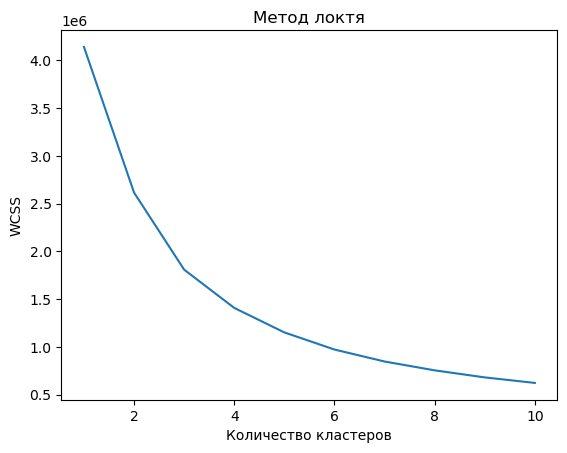

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca[:, :2])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

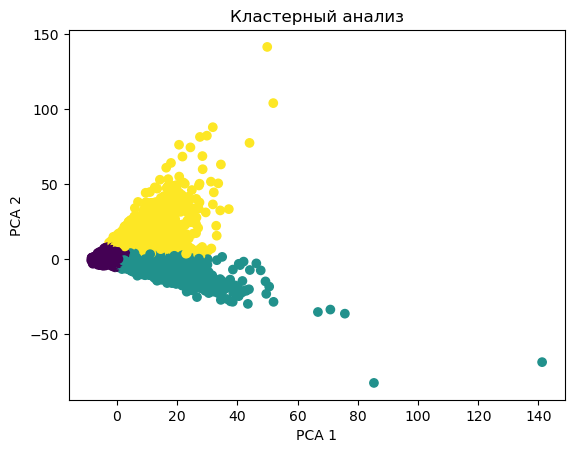

In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_pca[:, :2])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Кластерный анализ')
plt.show()

In [ ]:
# Уменьшение размерности можно проводить с помощью различных алгоритмов, например, метод главных компонент (PCA), t-SNE или UMAP.

In [ ]:
# Для оценки качества уменьшения размерности мы можем использовать различные метрики, такие как объясненный коэффициент дисперсии или сохранение попарных 
#расстояний. Мы также можем сгруппировать данные

In [ ]:
# Оценку качества уменьшения размерности можно выполнить путем сравнения результатов классификации или кластеризации до и после уменьшения размерности. 
# можно использовать такие метрики, как точность, полнота, F-оценка и AUC-ROC, чтобы оценить, как уменьшение размерности влияет на результаты.